<a href="https://colab.research.google.com/github/GusdPaula/postgraduation_fiap/blob/main/fase_5/CNNs_%26_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:

# Bibliotecas essenciais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os
import cv2

# Para Deep Learning
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout, Conv2D, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam

# Para validação do modelo
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("moazeldsokyx/dogs-vs-cats")

print("Path to dataset files:", path)

100%|██████████| 817M/817M [00:41<00:00, 20.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/moazeldsokyx/dogs-vs-cats/versions/1


In [29]:
from pathlib import Path
path = Path(path)
filepaths = list(path.glob(r'**/*.jpg'))
filepaths

[PosixPath('/root/.cache/kagglehub/datasets/moazeldsokyx/dogs-vs-cats/versions/1/dataset/test/dogs/dog (5374).jpg'),
 PosixPath('/root/.cache/kagglehub/datasets/moazeldsokyx/dogs-vs-cats/versions/1/dataset/test/dogs/dog (791).jpg'),
 PosixPath('/root/.cache/kagglehub/datasets/moazeldsokyx/dogs-vs-cats/versions/1/dataset/test/dogs/dog (3334).jpg'),
 PosixPath('/root/.cache/kagglehub/datasets/moazeldsokyx/dogs-vs-cats/versions/1/dataset/test/dogs/dog (2588).jpg'),
 PosixPath('/root/.cache/kagglehub/datasets/moazeldsokyx/dogs-vs-cats/versions/1/dataset/test/dogs/dog (374).jpg'),
 PosixPath('/root/.cache/kagglehub/datasets/moazeldsokyx/dogs-vs-cats/versions/1/dataset/test/dogs/dog (5192).jpg'),
 PosixPath('/root/.cache/kagglehub/datasets/moazeldsokyx/dogs-vs-cats/versions/1/dataset/test/dogs/dog (2403).jpg'),
 PosixPath('/root/.cache/kagglehub/datasets/moazeldsokyx/dogs-vs-cats/versions/1/dataset/test/dogs/dog (4518).jpg'),
 PosixPath('/root/.cache/kagglehub/datasets/moazeldsokyx/dogs-vs-c

In [44]:
labels = []
images = []

image_size = 64

for filepath in filepaths:
  head = os.path.split(filepath)
  animal = os.path.split(head[0])
  labels.append(animal[1])
  img = cv2.imread(str(filepath))
  img = cv2.resize(img, (image_size, image_size)).astype('float32') / 255.0
  images.append(img)

images = np.array(images)

labels = np.array(labels)

KeyboardInterrupt: 

In [ ]:
images.shape

(37461, 64, 64, 3)

In [ ]:
images

array([[[[0.29411766, 0.30588236, 0.3254902 ],
         [0.30588236, 0.31764707, 0.3372549 ],
         [0.39215687, 0.40392157, 0.42352942],
         ...,
         [0.52156866, 0.5411765 , 0.53333336],
         [0.52156866, 0.54901963, 0.5411765 ],
         [0.5686275 , 0.59607846, 0.58431375]],

        [[0.34117648, 0.3529412 , 0.37254903],
         [0.29803923, 0.30980393, 0.32941177],
         [0.35686275, 0.36862746, 0.3882353 ],
         ...,
         [0.5294118 , 0.5411765 , 0.53333336],
         [0.5176471 , 0.5372549 , 0.5294118 ],
         [0.54901963, 0.5686275 , 0.56078434]],

        [[0.27450982, 0.28627452, 0.30588236],
         [0.29803923, 0.30980393, 0.32941177],
         [0.32156864, 0.33333334, 0.3529412 ],
         ...,
         [0.5058824 , 0.5176471 , 0.5058824 ],
         [0.50980395, 0.52156866, 0.5137255 ],
         [0.56078434, 0.5686275 , 0.56078434]],

        ...,

        [[0.09019608, 0.09411765, 0.12941177],
         [0.09411765, 0.10196079, 0.13333334]

In [ ]:
labels

array(['dogs', 'dogs', 'dogs', ..., 'cats', 'cats', 'cats'], dtype='<U4')

In [ ]:
pd_filepaths = pd.Series(filepaths, name='Filepath').astype(str)

In [ ]:
pd_filepaths[:3]

,Filepath
0,/root/.cache/kagglehub/datasets/moazeldsokyx/d...
1,/root/.cache/kagglehub/datasets/moazeldsokyx/d...
2,/root/.cache/kagglehub/datasets/moazeldsokyx/d...


In [ ]:
labels[:3]

array(['dogs', 'dogs', 'dogs'], dtype='<U4')

In [ ]:
pd_labels = pd.Series(labels, name='Label')

In [ ]:
df = pd.concat([pd_filepaths, pd_labels], axis=1)

In [ ]:
df.head(5)

,Filepath,Label
0,/root/.cache/kagglehub/datasets/moazeldsokyx/d...,dogs
1,/root/.cache/kagglehub/datasets/moazeldsokyx/d...,dogs
2,/root/.cache/kagglehub/datasets/moazeldsokyx/d...,dogs
3,/root/.cache/kagglehub/datasets/moazeldsokyx/d...,dogs
4,/root/.cache/kagglehub/datasets/moazeldsokyx/d...,dogs


In [ ]:
df.tail(5)

,Filepath,Label
37456,/root/.cache/kagglehub/datasets/moazeldsokyx/d...,cats
37457,/root/.cache/kagglehub/datasets/moazeldsokyx/d...,cats
37458,/root/.cache/kagglehub/datasets/moazeldsokyx/d...,cats
37459,/root/.cache/kagglehub/datasets/moazeldsokyx/d...,cats
37460,/root/.cache/kagglehub/datasets/moazeldsokyx/d...,cats


In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df.head()

,Filepath,Label
0,/root/.cache/kagglehub/datasets/moazeldsokyx/d...,dogs
1,/root/.cache/kagglehub/datasets/moazeldsokyx/d...,dogs
2,/root/.cache/kagglehub/datasets/moazeldsokyx/d...,cats
3,/root/.cache/kagglehub/datasets/moazeldsokyx/d...,dogs
4,/root/.cache/kagglehub/datasets/moazeldsokyx/d...,cats


In [ ]:
df_singles = df.copy().drop_duplicates(subset=('Label')).reset_index()

In [ ]:
len(df_singles)

2

In [ ]:
num_class = df_singles.shape[0]
num_class

2

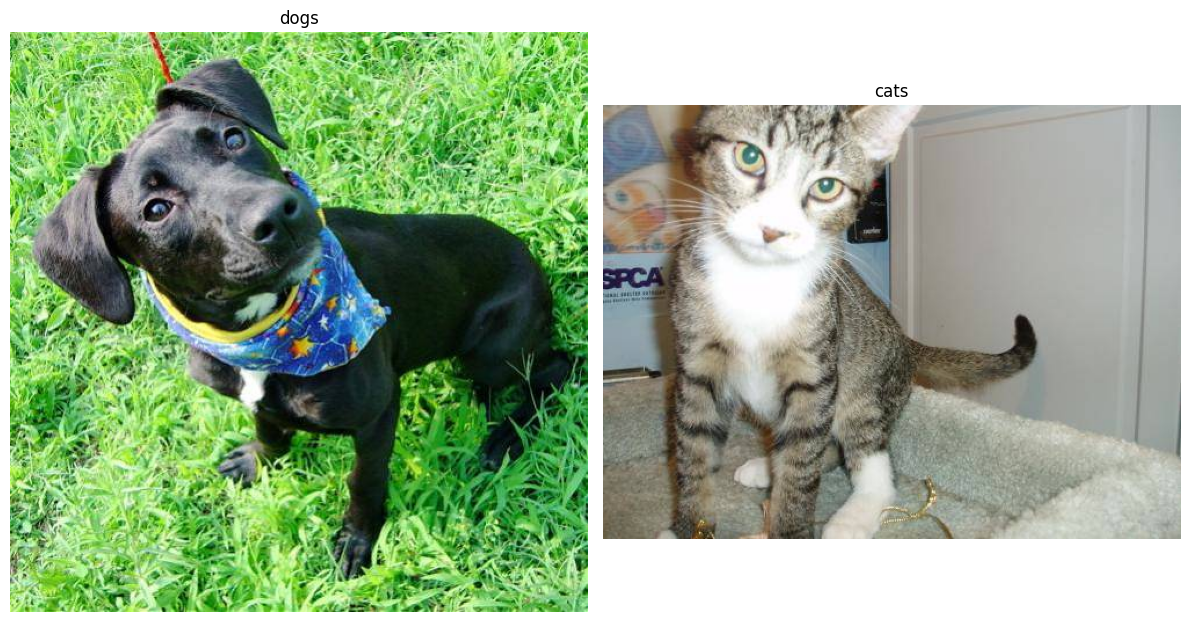

In [ ]:
ROW = 1
COLUMN = 2

plt.figure(figsize=(12,9))

for i in range(num_class):
  image = df_singles.Filepath[i]
  plt.subplot(ROW, COLUMN, i + 1)
  plt.imshow(plt.imread(image))
  plt.title('{}'.format(df_singles.Label[i]))
  plt.axis('off')
  plt.tight_layout()

plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, stratify=labels, random_state=44)

In [ ]:
x_train.shape

(33714, 64, 64, 3)

In [ ]:
x_test.shape

(3747, 64, 64, 3)

In [ ]:
df['Label'].value_counts()

,count
Label,
cats,18742
dogs,18719


In [ ]:
x_train_flat = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2] * x_train.shape[3])
x_test_flat = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2] * x_test.shape[3])


In [ ]:
x_train_flat.shape

(33714, 12288)

In [ ]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

y_train_tf = keras.utils.to_categorical(y_train, num_class)
y_test_tf = keras.utils.to_categorical(y_test, num_class)

In [ ]:
checkpointer = ModelCheckpoint(filepath='weights.best.hdf5.keras', verbose=0, save_best_only=True)

In [ ]:
input_shape = (image_size, image_size, 3)

learning_rate = 0.001
weight_decay = 1e-4

In [ ]:
tf.random.set_seed(44)
model = Sequential()

model.add(Conv2D(128,
                 kernel_size=(3, 3),
                 strides=(2,2),
                 padding='same',
                 activation='relu',
                 kernel_regularizer=keras.regularizers.l2(0.001),
                 input_shape=input_shape
))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))

In [ ]:
model.add(Dropout(0.5))

In [ ]:
model.add(Conv2D(92,
                 kernel_size=(3, 3),
                 strides=(2, 2),
                 padding='same',
                 activation='relu',
                 kernel_regularizer=keras.regularizers.l2(0.001)))

In [ ]:
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))

In [ ]:
model.add(Dropout(0.5))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(256, activation='relu'))

In [ ]:
model.add(Dense(y_train_tf.shape[1], activation='softmax'))

In [ ]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=10, verbose=1, mode='auto')
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate), metrics=['accuracy'])
model.save('.cat_dog.h5')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 92)            │         106,076 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 92)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4, 4, 92)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1472)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         377,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 487,262 (1.86 MB)

 Trainable params: 487,262 (1.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train_tf, validation_split=0.25, callbacks=[monitor, checkpointer], verbose=1, epochs=45, batch_size=50, shuffle=True)

Epoch 1/45
506/506 ━━━━━━━━━━━━━━━━━━━━ 101s 195ms/step - accuracy: 0.5788 - loss: 0.7327 - val_accuracy: 0.7116 - val_loss: 0.5995
Epoch 2/45
506/506 ━━━━━━━━━━━━━━━━━━━━ 132s 176ms/step - accuracy: 0.6940 - loss: 0.6095 - val_accuracy: 0.7141 - val_loss: 0.5776
Epoch 3/45
506/506 ━━━━━━━━━━━━━━━━━━━━ 142s 176ms/step - accuracy: 0.7044 - loss: 0.5837 - val_accuracy: 0.7165 - val_loss: 0.5628
Epoch 4/45
506/506 ━━━━━━━━━━━━━━━━━━━━ 139s 171ms/step - accuracy: 0.7208 - loss: 0.5658 - val_accuracy: 0.7437 - val_loss: 0.5365
Epoch 5/45
506/506 ━━━━━━━━━━━━━━━━━━━━ 137s 161ms/step - accuracy: 0.7325 - loss: 0.5549 - val_accuracy: 0.7414 - val_loss: 0.5357
Epoch 6/45
506/506 ━━━━━━━━━━━━━━━━━━━━ 83s 162ms/step - accuracy: 0.7387 - loss: 0.5477 - val_accuracy: 0.7596 - val_loss: 0.5205
Epoch 7/45
506/506 ━━━━━━━━━━━━━━━━━━━━ 141s 160ms/step - accuracy: 0.7406 - loss: 0.5440 - val_accuracy: 0.7575 - val_loss: 0.5238
Epoch 8/45
506/506 ━━━━━━━━━━━━━━━━━━━━ 87s 171ms/step - accuracy: 0.7432 - l

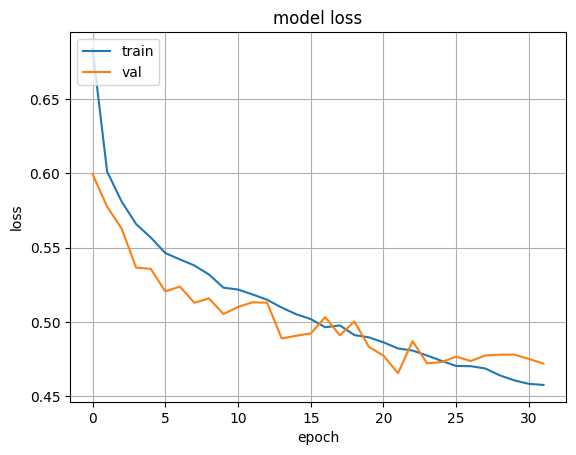

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid(True)
plt.show()

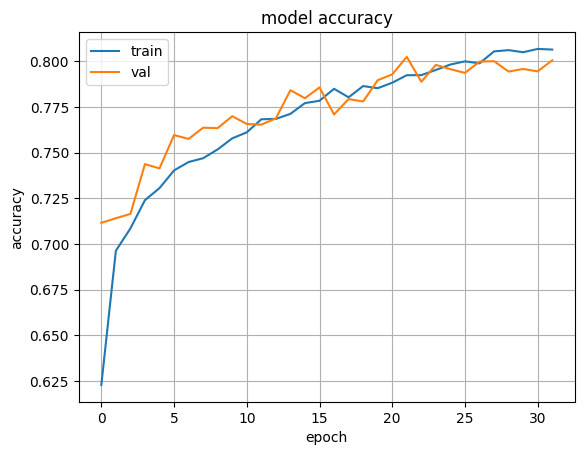

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
cnn_pred_cat_dog = model.predict(x_test)

118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step


In [ ]:
y_test_tf

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [ ]:
#cnn_pred_cat_dog = np.argmax(cnn_pred_cat_dog, axis=1)
y_true = np.argmax(y_test_tf, axis=1)
y_true

array([1, 0, 1, ..., 1, 0, 0])

In [47]:
# Cria um array de nomes de caracteres igual ao array de labels
animal_names = labels
# Reduza os nomes dos animais para apenas valores dict únicos
animal_names = list(dict.fromkeys(animal_names))
# Ordena os caracteres em ordem alfabética, qual é a ordem em que os dados são alimentados
animal_names = sorted(animal_names)
animal_names

['dogs']

In [ ]:
cm = metrics.confusion_matrix(y_true, cnn_pred_cat_dog)

cm

array([[1588,  287],
       [ 455, 1417]])

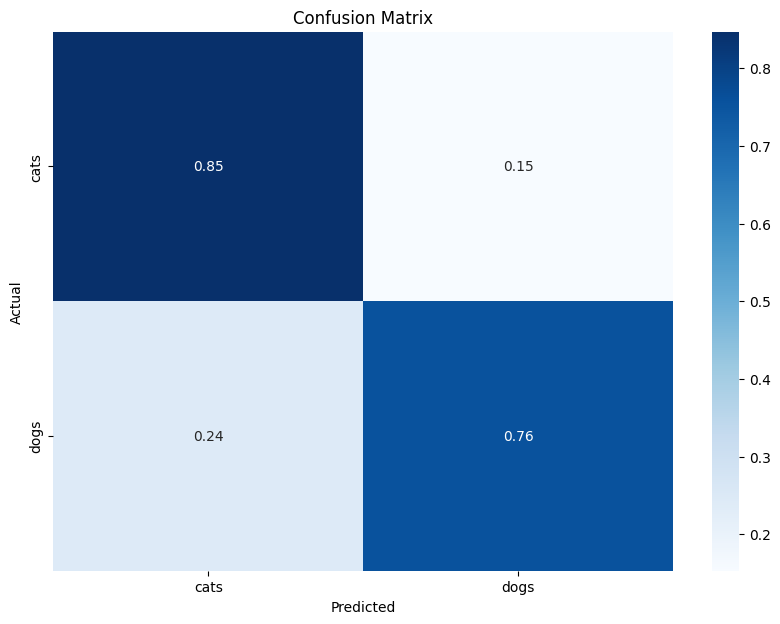

In [ ]:
import seaborn as sns
# Create a heatmap using seaborn
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 7))  # Adjust figure size if needed
sns.heatmap(cm_normalized, annot=True, cmap="Blues",
            xticklabels=animal_names, yticklabels=animal_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(metrics.classification_report(y_true, cnn_pred_cat_dog, target_names=animal_names))

              precision    recall  f1-score   support

        cats       0.78      0.85      0.81      1875
        dogs       0.83      0.76      0.79      1872

    accuracy                           0.80      3747
   macro avg       0.80      0.80      0.80      3747
weighted avg       0.80      0.80      0.80      3747



In [48]:
def guess_animal(file_path):
  image = cv2.imread(file_path)
  img = cv2.resize(image, (64, 64)).astype('float32') / 255.0
  img = np.expand_dims(img, axis=0)

  pred = model.predict(img)
  class_ = np.argmax(pred, axis=1)

  print(['cat', 'dog'][class_[0]])
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
dogs


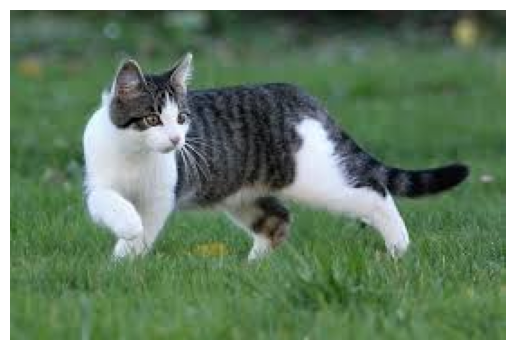

In [ ]:
guess_animal('/content/cat_1.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
dogs


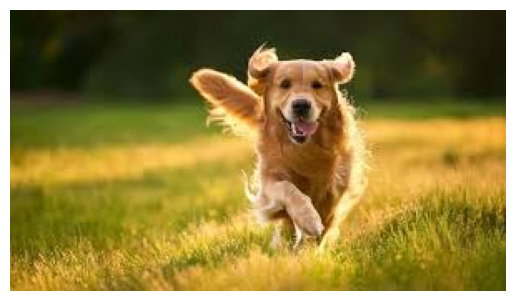

In [ ]:
guess_animal('/content/dog.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
cats


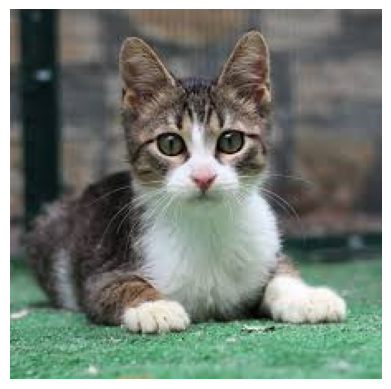

In [ ]:
guess_animal('/content/cat.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
dogs


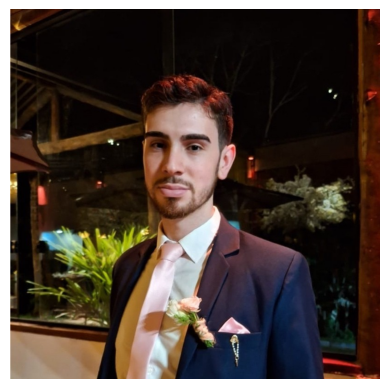

In [ ]:
guess_animal('/content/1734403843201.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
cats


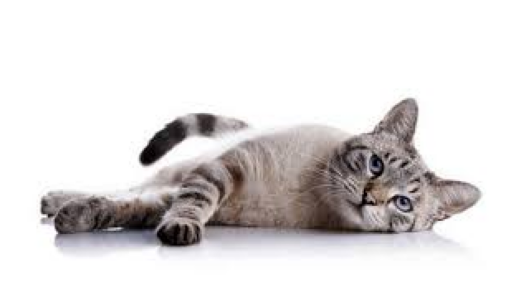

In [ ]:
guess_animal('/content/cat_3.jpg')

In [14]:
# Para trabalhar com deep learning
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Carregue o modelo MobileNetV2 pré-treinado (sem as camadas densas no topo)
# O MobileNetV2 é uma rede neural pré-treinada que foi treinada em um grande conjunto de dados chamado ImageNet, que contém milhões de imagens de várias categorias diferentes.
# weights='imagenet': carregar os pesos pré-treinados da versão do MobileNetV2 que foi treinada no conjunto de dados ImageNet
# include_top=False: excluindo a camada de classificação final (top) da rede. Essa camada de classificação normalmente consiste em uma camada densa (fully connected)
# que produz saídas para cada classe no conjunto de dados original do ImageNet. Excluindo essa camada, você está preparando o modelo para personalizar a camada de classificação para uma nova tarefa.

base_model = MobileNetV2(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)


<ipython-input-14-5c33edc83cc5>:13: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False)


In [31]:
folder_path = "/root/.cache/kagglehub/datasets/moazeldsokyx/dogs-vs-cats/versions/1/dataset/train"

In [32]:
for layer in base_model.layers:
  layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    folder_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)



Found 20000 images belonging to 2 classes.


In [34]:
model.fit(
    train_generator,
    epochs=5
)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 270s 432ms/step - accuracy: 0.9677 - loss: 0.0834
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 263s 421ms/step - accuracy: 0.9734 - loss: 0.0676
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 263s 421ms/step - accuracy: 0.9755 - loss: 0.0582
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 261s 417ms/step - accuracy: 0.9784 - loss: 0.0565
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 258s 413ms/step - accuracy: 0.9804 - loss: 0.0501


In [35]:
folder_path_test = "/root/.cache/kagglehub/datasets/moazeldsokyx/dogs-vs-cats/versions/1/dataset/test"

In [36]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [37]:
test_generator = test_datagen.flow_from_directory(
    folder_path_test,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 12461 images belonging to 2 classes.


In [38]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

390/390 ━━━━━━━━━━━━━━━━━━━━ 36s 85ms/step - accuracy: 0.9830 - loss: 0.0377
Test accuracy: 0.9831474423408508


In [39]:
test_loss

0.039621081203222275

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
cat


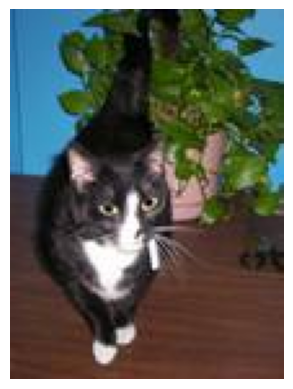

In [49]:
guess_animal('/root/.cache/kagglehub/datasets/moazeldsokyx/dogs-vs-cats/versions/1/dataset/validation/cats/cat.10250.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
cat


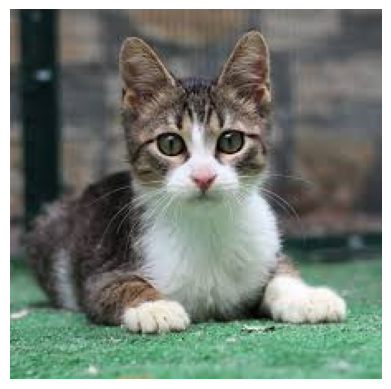

In [50]:
guess_animal('/content/t.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
dog


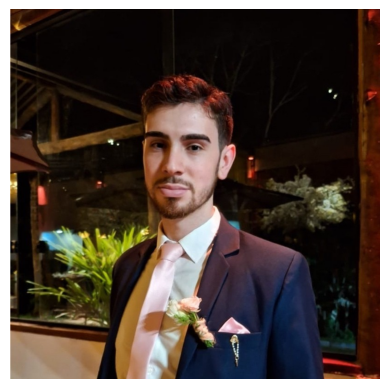

In [51]:
guess_animal('/content/1734403843201.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
dog


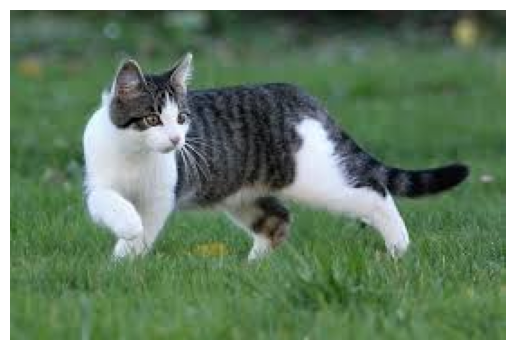

In [56]:
guess_animal('/content/cat_1.jpg')

In [57]:
folder_path_val = "/root/.cache/kagglehub/datasets/moazeldsokyx/dogs-vs-cats/versions/1/dataset/validation"

In [62]:
val_generator = test_datagen.flow_from_directory(
    folder_path_val,
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    class_mode='categorical'
)

Found 5000 images belonging to 2 classes.


In [63]:
loss, acc = model.evaluate(val_generator)
print(f'accuracy: {acc}')
print('loss: ', loss)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - accuracy: 0.9809 - loss: 0.0441
accuracy: 0.9811999797821045
loss:  0.045083146542310715
